<a href="https://colab.research.google.com/github/google/evojax/blob/main/examples/notebooks/TutorialCallEvoJAXAlgorithmDirectly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to call EvoJAX algorithm directly

In this notebook, we show how to call directly EvoJAX Algorithm, using CMA-ES as an example.

In [1]:
! pip install evojax

from google.colab import output
output.clear()

In [2]:
import jax
from jax import numpy as jnp

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
PARAM_SIZE = 2

# define evaluation at a single point

def f(x: jnp.ndarray) -> jnp.ndarray:
  c = jnp.array([+0.3, -0.7])
  y = - jnp.sum(jnp.abs(x - c))
  # so y is minimized with x = c
  return y

# ... test it
_x = jax.random.normal(
    key=jax.random.PRNGKey(123), 
    shape=(PARAM_SIZE,)
)
print(f'f({_x}) = {f(_x)}')

# evalute f in batch
f_batch = jax.vmap(f, in_axes=(0,), out_axes=0)

# ... test it
TEST_BATCH_SIZE = 3
_x_batch = jax.random.normal(
    key=jax.random.PRNGKey(123), 
    shape=(TEST_BATCH_SIZE, PARAM_SIZE,)
)
print(f'f_batch({_x_batch}) = {f_batch(_x_batch)}')

f([-0.03049826  0.49289012]) = -1.523388385772705
f_batch([[-0.29256076 -0.2805558 ]
 [-0.78786534 -0.90408975]
 [ 0.89289093  0.75706756]]) = [-1.012005  -1.2919551 -2.0499585]


In [4]:
from evojax.algo import PGPE, CMA_ES_JAX

In [ ]:
n_population = 128
n_feature = PARAM_SIZE
n_iterations = 20
report_interval = 1

In [5]:
#@title CMA ES without particular initilization

solver = CMA_ES_JAX(
  pop_size=n_population,
  param_size=n_feature,
  init_stdev=0.1,
)

have_printed = False
recorded_best_fitness_no_init = []

for iter_ in range(1, 1 + n_iterations):
  solutions = solver.ask() 
  fitnesses = f_batch(solutions)
  solver.tell(fitnesses)

  if iter_ % report_interval == 0 or iter_ == 1 or iter_ == n_iterations:
    best_solutions = jnp.expand_dims(solver.best_params, axis=0)
    best_fitnesses = f_batch(best_solutions)
    recorded_best_fitness_no_init.append(
        np.array(best_fitnesses)[0]
    )

    if not have_printed:
      have_printed = True
      print(f'solutions.shape = {solutions.shape}')
      print(f'fitnesses.shape = {fitnesses.shape}')
      print(f'best_solutions.shape = {best_solutions.shape}')

    print(f'f_batch({best_solutions}) = {best_fitnesses}')

solutions.shape = (128, 2)
fitnesses.shape = (128,)
best_solutions.shape = (1, 2)
f_batch([[ 0.08474442 -0.073248  ]]) = [-0.84200764]
f_batch([[ 0.17500642 -0.15183967]]) = [-0.6731539]
f_batch([[ 0.3509241  -0.40125412]]) = [-0.34966996]
f_batch([[ 0.39421523 -0.58534455]]) = [-0.20887065]
f_batch([[ 0.32162884 -0.6903529 ]]) = [-0.0312759]
f_batch([[ 0.3269463 -0.7115207]]) = [-0.03846696]
f_batch([[ 0.3014449 -0.7109104]]) = [-0.01235527]
f_batch([[ 0.29477358 -0.69933814]]) = [-0.00588828]
f_batch([[ 0.2975316 -0.6987489]]) = [-0.00371951]
f_batch([[ 0.29991594 -0.6995431 ]]) = [-0.00054094]
f_batch([[ 0.29953426 -0.70033973]]) = [-0.0008055]
f_batch([[ 0.29977402 -0.70027804]]) = [-0.00050405]
f_batch([[ 0.299997  -0.6999695]]) = [-3.3527613e-05]
f_batch([[ 0.30000675 -0.69997686]]) = [-2.9861927e-05]
f_batch([[ 0.30001897 -0.6999943 ]]) = [-2.4616718e-05]
f_batch([[ 0.29999867 -0.7000037 ]]) = [-5.0365925e-06]
f_batch([[ 0.30000395 -0.7000022 ]]) = [-6.1392784e-06]
f_batch([[ 0.

In [6]:
#@title CMA ES with initilization
n_population = 128
n_feature = PARAM_SIZE
n_iterations = 20
report_interval = 1

solver = CMA_ES_JAX(
  pop_size=n_population,
  param_size=n_feature,
  mean=jnp.array([0.35, -0.65]),
  init_stdev=0.1,
)

have_printed = False
recorded_best_fitness_with_init = []

for iter_ in range(1, 1 + n_iterations):
  solutions = solver.ask() 
  fitnesses = f_batch(solutions)
  solver.tell(fitnesses)

  if iter_ % report_interval == 0 or iter_ == 1 or iter_ == n_iterations:
    best_solutions = jnp.expand_dims(solver.best_params, axis=0)
    best_fitnesses = f_batch(best_solutions)
    recorded_best_fitness_with_init.append(
        np.array(best_fitnesses)[0]
    )

    if not have_printed:
      have_printed = True
      print(f'solutions.shape = {solutions.shape}')
      print(f'fitnesses.shape = {fitnesses.shape}')
      print(f'best_solutions.shape = {best_solutions.shape}')

    print(f'f_batch({best_solutions}) = {best_fitnesses}')


solutions.shape = (128, 2)
fitnesses.shape = (128,)
best_solutions.shape = (1, 2)
f_batch([[ 0.30595613 -0.6888452 ]]) = [-0.01711088]
f_batch([[ 0.29828358 -0.6956377 ]]) = [-0.00607872]
f_batch([[ 0.2994544 -0.7001903]]) = [-0.00073594]
f_batch([[ 0.29997295 -0.70111954]]) = [-0.00114661]
f_batch([[ 0.29916427 -0.7002495 ]]) = [-0.00108525]
f_batch([[ 0.3000644 -0.7009134]]) = [-0.00097784]
f_batch([[ 0.3001208  -0.70024765]]) = [-0.00036845]
f_batch([[ 0.29998836 -0.7001801 ]]) = [-0.00019178]
f_batch([[ 0.30004293 -0.7000589 ]]) = [-0.0001018]
f_batch([[ 0.30002195 -0.7000242 ]]) = [-4.6133995e-05]
f_batch([[ 0.29999524 -0.7000104 ]]) = [-1.5199184e-05]
f_batch([[ 0.30000433 -0.7000072 ]]) = [-1.1533499e-05]
f_batch([[ 0.3000024 -0.6999964]]) = [-5.9604645e-06]
f_batch([[ 0.30000103 -0.69999915]]) = [-1.847744e-06]
f_batch([[ 0.29999965 -0.6999996 ]]) = [-7.748604e-07]
f_batch([[ 0.30000004 -0.7       ]]) = [-2.9802322e-08]
f_batch([[ 0.29999992 -0.6999999 ]]) = [-1.4901161e-07]
f_

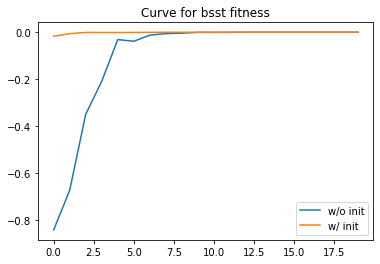

In [16]:
plt.plot(recorded_best_fitness_no_init, label='w/o init')
plt.plot(recorded_best_fitness_with_init, label='w/ init')
plt.legend()
plt.title('Curve for bsst fitness')
plt.show()